In [4]:
import os

cur_path = '/Users/sharveshs/Downloads/archive'

# Print the contents of the main directory to verify folder names
print("Contents of the main directory:")
print(os.listdir(cur_path))

# Check if 'Train' directory exists
train_path = os.path.join(cur_path, 'Train')
if not os.path.isdir(train_path):
    print(f"Train directory does not exist at {train_path}")

# Check the contents of the 'Train' directory
if os.path.isdir(train_path):
    for class_dir in os.listdir(train_path):
        print(f"Class directory: {class_dir}")
        print(os.listdir(os.path.join(train_path, class_dir)))


Contents of the main directory:
['.DS_Store', 'Test', 'Test.csv', 'Meta', 'Train', 'Meta.csv', 'Train.csv']
Class directory: 32
['00032_00003_00026.png', '00032_00000_00006.png', '00032_00000_00012.png', '00032_00005_00009.png', '00032_00005_00021.png', '00032_00006_00029.png', '00032_00006_00001.png', '00032_00006_00015.png', '00032_00006_00014.png', '00032_00006_00000.png', '00032_00006_00028.png', '00032_00005_00020.png', '00032_00005_00008.png', '00032_00000_00013.png', '00032_00000_00007.png', '00032_00003_00027.png', '00032_00003_00025.png', '00032_00003_00019.png', '00032_00000_00011.png', '00032_00000_00005.png', '00032_00005_00022.png', '00032_00006_00016.png', '00032_00006_00002.png', '00032_00006_00003.png', '00032_00006_00017.png', '00032_00005_00023.png', '00032_00000_00004.png', '00032_00000_00010.png', '00032_00003_00018.png', '00032_00003_00024.png', '00032_00003_00008.png', '00032_00003_00020.png', '00032_00000_00028.png', '00032_00000_00014.png', '00032_00000_00000.pn

In [5]:
import numpy as np
import os
from PIL import Image

data = []
labels = []
classes = 43
cur_path = '/Users/sharveshs/Downloads/archive'  # Set the correct path to your dataset

for i in range(classes):
    path = os.path.join(cur_path, 'Train', str(i))  # Construct the path for class i
    images = os.listdir(path)  # List all files in the directory

    for img_name in images:
        try:
            image = Image.open(os.path.join(path, img_name))  # Open the image
            image = image.resize((30, 30))  # Resize the image
            image = np.array(image)  # Convert image to NumPy array
            data.append(image)  # Append image data to list
            labels.append(i)  # Append label to list
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")

data = np.array(data)  # Convert list of images to NumPy array
labels = np.array(labels)  # Convert list of labels to NumPy array

print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")


Data shape: (39209, 30, 30, 3)
Labels shape: (39209,)


In [6]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Print the shapes of data and labels
print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Convert labels to categorical format
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Print the shapes of the converted labels
print(f"y_train shape after to_categorical: {y_train.shape}")
print(f"y_test shape after to_categorical: {y_test.shape}")


Data shape: (39209, 30, 30, 3)
Labels shape: (39209,)
X_train shape: (31367, 30, 30, 3)
X_test shape: (7842, 30, 30, 3)
y_train shape: (31367,)
y_test shape: (7842,)
y_train shape after to_categorical: (31367, 43)
y_test shape after to_categorical: (7842, 43)


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Initialize the model
model = Sequential()

# Add layers to the model
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(43, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-08-03 14:11:12.162884: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-08-03 14:11:12.162907: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-08-03 14:11:12.162912: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-08-03 14:11:12.163324: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-03 14:11:12.163339: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow devi

In [8]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15


2024-08-03 14:11:13.011084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


491/491 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.1849 - loss: 4.7371 - val_accuracy: 0.8387 - val_loss: 0.6943
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.7425 - loss: 0.8983 - val_accuracy: 0.9532 - val_loss: 0.2078
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8691 - loss: 0.4648 - val_accuracy: 0.9668 - val_loss: 0.1298
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.8974 - loss: 0.3635 - val_accuracy: 0.9714 - val_loss: 0.1056
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9223 - loss: 0.2646 - val_accuracy: 0.9795 - val_loss: 0.0779
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9356 - loss: 0.2218 - val_accuracy: 0.9756 - val_loss: 0.0855
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9393 - loss: 0.2156 - val_accuracy: 0.9846 - val_loss: 0.0568
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9420 - loss: 0.2057 - val_accurac

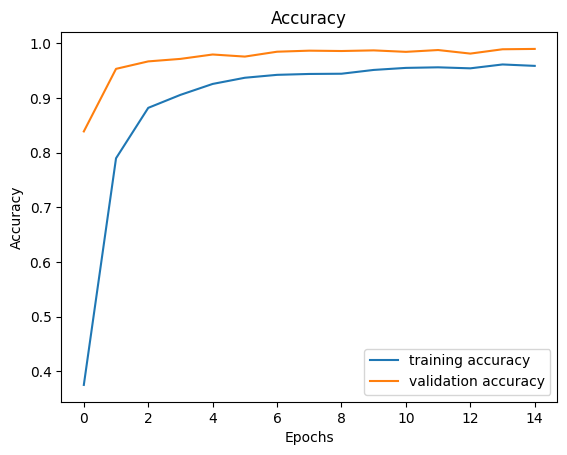

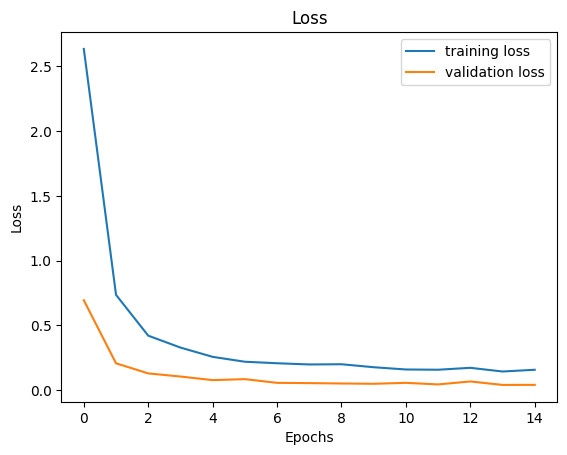

In [9]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and have the history object
# For example: history = model.fit(...)

# Plot training & validation accuracy values
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [27]:
from sklearn.metrics import accuracy_score
import pandas as pd
from PIL import Image
import numpy as np
import os

# Load the test data
test_data_path = "/Users/sharveshs/Downloads/archive/Test.csv"
y_test = pd.read_csv(test_data_path)

# Extract the image paths and labels
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

# Initialize a list to store image data
data = []

# Define the base path for images
base_path = '/Users/sharveshs/Downloads/archive'

# Load and preprocess the images
for img in imgs:
    img_path = os.path.join(base_path, img)  # Construct the full image path
    if os.path.exists(img_path):
        image = Image.open(img_path)
        image = image.resize((30, 30))
        data.append(np.array(image))
    else:
        print(f"Image not found: {img_path}")

# Convert the data list to a numpy array
X_test = np.array(data)

# Normalize the image data
X_test = X_test / 255.0

# Ensure the number of images matches the number of labels
assert len(X_test) == len(labels), "Number of images and labels must match"

# Predict the classes using the model
predictions = model.predict(X_test)
pred = np.argmax(predictions, axis=1)

# Calculate the accuracy
accuracy = accuracy_score(labels, pred)
print(f'Accuracy: {accuracy}')


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [30]:
model.save("traffic_classifier.h5")

In [34]:
import tkinter as tk
from tkinter import filedialog, Label, Button
from PIL import ImageTk, Image
import numpy as np
from keras.models import load_model

# Load the trained model to classify sign
model = load_model("traffic_classifier.h5")

# Dictionary to label all traffic signs classes
classes = {
    1: 'Speed limit (20km/h)', 2: 'Speed limit (30km/h)', 3: 'Speed limit (50km/h)',
    4: 'Speed limit (60km/h)', 5: 'Speed limit (70km/h)', 6: 'Speed limit (80km/h)',
    7: 'End of speed limit (80km/h)', 8: 'Speed limit (100km/h)', 9: 'Speed limit (120km/h)',
    10: 'No passing', 11: 'No passing veh over 3.5 tons', 12: 'Right-of-way at intersection',
    13: 'Priority road', 14: 'Yield', 15: 'Stop', 16: 'No vehicles',
    17: 'Veh > 3.5 tons prohibited', 18: 'No entry', 19: 'General caution',
    20: 'Dangerous curve left', 21: 'Dangerous curve right', 22: 'Double curve',
    23: 'Bumpy road', 24: 'Slippery road', 25: 'Road narrows on the right',
    26: 'Road work', 27: 'Traffic signals', 28: 'Pedestrians', 29: 'Children crossing',
    30: 'Bicycles crossing', 31: 'Beware of ice/snow', 32: 'Wild animals crossing',
    33: 'End speed + passing limits', 34: 'Turn right ahead', 35: 'Turn left ahead',
    36: 'Ahead only', 37: 'Go straight or right', 38: 'Go straight or left',
    39: 'Keep right', 40: 'Keep left', 41: 'Roundabout mandatory',
    42: 'End of no passing', 43: 'End no passing veh > 3.5 tons'
}

# Initialise GUI
top = tk.Tk()
top.geometry('800x600')
top.title('Traffic Sign Classification')
top.configure(background='#CDCDCD')

label = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))
sign_image = Label(top)

def classify(file_path):
    image = Image.open(file_path)
    image = image.resize((30, 30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    predictions = model.predict(image)
    pred = np.argmax(predictions, axis=1)[0]
    sign = classes[pred + 1]
    print(sign)
    label.configure(foreground='#011638', text=sign)

def show_classify_button(file_path):
    classify_b = Button(top, text="Classify Image", command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
    classify_b.place(relx=0.79, rely=0.46)

def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25), (top.winfo_height()/2.25)))
        im = ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image = im
        label.configure(text='')
        show_classify_button(file_path)
    except Exception as e:
        print(f"Error: {e}")

upload = Button(top, text="Upload an image", command=upload_image, padx=10, pady=5)
upload.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))

upload.pack(side=tk.BOTTOM, pady=50)
sign_image.pack(side=tk.BOTTOM, expand=True)
label.pack(side=tk.BOTTOM, expand=True)
heading = Label(top, text="Know Your Traffic Sign", pady=20, font=('arial', 20, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()

top.mainloop()


: 